In [ ]:
%cd /
from google.colab import drive
drive.mount('/content/gdrive/')

!ln -s /content/gdrive/My\ Drive/ ./mydrive
%cd /content/gdrive/MyDrive/projekt_inzynierski

/
Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).
ln: failed to create symbolic link './mydrive/My Drive': File exists
/content/gdrive/MyDrive/projekt_inzynierski


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df = pd.read_csv('df_kaggle_enriched_cleaned.csv')

In [ ]:
df.sample(5)

track_id                 name            artist  \
33139  TRZYPUA128E078F880  Million Dollar Bash         Bob Dylan   
4924   TRUXABP128F930EA82     Keep It Together            Guster   
24334  TRACENZ128F425C69F       Riding Shotgun           Anthrax   
21587  TRCVRKQ128F92EF832          Cache-Cache  Ludovico Einaudi   
473    TRUDQBY128F1487A71               Dreams     Fleetwood Mac   

                                     spotify_preview_url  \
33139  https://p.scdn.co/mp3-preview/fac6284d650ae49f...   
4924   https://p.scdn.co/mp3-preview/74a0e1663da083dd...   
24334  https://p.scdn.co/mp3-preview/321daa80e83b2b9a...   
21587  https://p.scdn.co/mp3-preview/b43bfe994f451a5d...   
473    https://p.scdn.co/mp3-preview/10b5068313e5ee28...   

                                                 tags genre  year  \
33139          rock, folk, singer_songwriter, country   NaN  2006   
4924                                    indie, mellow   NaN  2003   
24334                                    thrash_metal   NaN  1995   
21587       instrumental, classical, piano, beautiful   NaN  2004   
473    rock, pop, female_vocalists, classic_rock, 70s   Rap  1988   

       duration_ms  danceability  energy  ...              album_name  \
33139       151400         0.592  0.3170  ...      The Basement Tapes   
4924        223333         0.575  0.5970  ...        Keep It Together   
24334       266733         0.231  0.9810  ...               Stomp 442   
21587       231693         0.390  0.0904  ...        Sotto Falso Nome   
473         254453         0.823  0.3380  ...  Rumours (Super Deluxe)   

       popularity                                        spotify_url  \
33139        32.0  https://open.spotify.com/track/2otxmLJLxYQPVq0...   
4924         38.0  https://open.spotify.com/track/0woxuXQugLXnaKm...   
24334        13.0  https://open.spotify.com/track/5YdPd7x5HHfO6jf...   
21587        38.0  https://open.spotify.com/track/13qKmE6xd81F7Mn...   
473          89.0  https://open.spotify.com/track/0ofHAoxe9vBkTCp...   

       explicit                                       album_images  \
33139     False  [{"height": 640, "width": 640, "url": "https:/...   
4924      False  [{"height": 640, "width": 640, "url": "https:/...   
24334     False  [{"height": 640, "width": 640, "url": "https:/...   
21587     False  [{"height": 640, "width": 640, "url": "https:/...   
473       False  [{"height": 640, "width": 640, "url": "https:/...   

                   spotify_id   n_tempo  n_loudness  \
33139  2otxmLJLxYQPVq0FYIUd34  0.500019    0.724113   
4924   0woxuXQugLXnaKmeMFKE3G  0.492124    0.812797   
24334  5YdPd7x5HHfO6jfK5B8StL  0.684255    0.853886   
21587  13qKmE6xd81F7MnfXmqWr0  0.503275    0.665834   
473    0ofHAoxe9vBkTCp2UQIavz  0.504293    0.692954   

                                               tags_list  tags_count  
33139   ['rock', 'folk', 'singer_songwriter', 'country']           4  
4924                                 ['indie', 'mellow']           2  
24334                                   ['thrash_metal']           1  
21587  ['instrumental', 'classical', 'piano', 'beauti...           4  
473    ['rock', 'pop', 'female_vocalists', 'classic_r...           5  

[5 rows x 30 columns]

In [ ]:
df.shape

(49766, 30)

# Analiza danych

In [ ]:
df.shape

(49766, 30)

In [ ]:
df.columns

Index(['track_id', 'name', 'artist', 'spotify_preview_url', 'tags', 'genre',
       'year', 'duration_ms', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'album_name', 'popularity',
       'spotify_url', 'explicit', 'album_images', 'spotify_id', 'n_tempo',
       'n_loudness', 'tags_list', 'tags_count'],
      dtype='object')

In [ ]:
df.describe()

year   duration_ms  danceability        energy           key  \
count  49766.000000  4.976600e+04  49766.000000  49766.000000  49766.000000   
mean    2004.008661  2.511567e+05      0.493800      0.686554      5.314050   
std        8.887067  1.073006e+05      0.178649      0.251713      3.567868   
min     1900.000000  1.439000e+03      0.000000      0.000000      0.000000   
25%     2001.000000  1.929060e+05      0.364000      0.514000      2.000000   
50%     2006.000000  2.349860e+05      0.498000      0.744000      5.000000   
75%     2009.000000  2.880580e+05      0.621000      0.905000      9.000000   
max     2022.000000  3.816373e+06      0.986000      1.000000     11.000000   

           loudness          mode   speechiness  acousticness  \
count  49766.000000  49766.000000  49766.000000  49766.000000   
mean      -8.286426      0.631656      0.075825      0.213723   
std        4.537970      0.482360      0.075660      0.302611   
min      -60.000000      0.000000      0.000000      0.000000   
25%      -10.374000      0.000000      0.035200      0.001403   
50%       -7.198000      1.000000      0.048100      0.040000   
75%       -5.088000      1.000000      0.083300      0.340000   
max        3.642000      1.000000      0.954000      0.996000   

       instrumentalness      liveness       valence         tempo  \
count      49766.000000  49766.000000  49766.000000  49766.000000   
mean           0.224158      0.215346      0.433672    123.494551   
std            0.336496      0.184658      0.258782     29.605099   
min            0.000000      0.000000      0.000000      0.000000   
25%            0.000017      0.098400      0.215000    100.674500   
50%            0.005460      0.137000      0.406000    121.981000   
75%            0.436000      0.289000      0.635000    141.593250   
max            0.999000      0.999000      0.993000    238.895000   

       time_signature    popularity       n_tempo    n_loudness    tags_count  
count    49766.000000  49766.000000  49766.000000  49766.000000  49766.000000  
mean         3.899228     33.810573      0.516941      0.812570      3.668267  
std          0.417627     17.685844      0.123925      0.071305      2.472062  
min          0.000000      0.000000      0.000000      0.000000      0.000000  
25%          4.000000     21.000000      0.421417      0.779768      2.000000  
50%          4.000000     32.000000      0.510605      0.829672      3.000000  
75%          4.000000     45.000000      0.592701      0.862826      5.000000  
max          5.000000     92.000000      1.000000      1.000000     52.000000

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49766 entries, 0 to 49765
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   track_id             49766 non-null  object 
 1   name                 49766 non-null  object 
 2   artist               49766 non-null  object 
 3   spotify_preview_url  49766 non-null  object 
 4   tags                 48687 non-null  object 
 5   genre                21941 non-null  object 
 6   year                 49766 non-null  int64  
 7   duration_ms          49766 non-null  int64  
 8   danceability         49766 non-null  float64
 9   energy               49766 non-null  float64
 10  key                  49766 non-null  int64  
 11  loudness             49766 non-null  float64
 12  mode                 49766 non-null  int64  
 13  speechiness          49766 non-null  float64
 14  acousticness         49766 non-null  float64
 15  instrumentalness     49766 non-null 

In [ ]:
def safe_nunique(col):
    try:
        return col.nunique()
    except TypeError:
        return 'unhashable'

df_summary = pd.DataFrame({
    'dtype': df.dtypes,
    'unique': [safe_nunique(df[c]) for c in df.columns],
    'missing': df.isnull().sum()
})

df_summary

dtype  unique  missing
track_id              object   49766        0
name                  object   49766        0
artist                object    8204        0
spotify_preview_url   object   49738        0
tags                  object   19791     1079
genre                 object      15    27825
year                   int64      75        0
duration_ms            int64   23952        0
danceability         float64    1082        0
energy               float64    1586        0
key                    int64      12        0
loudness             float64   15226        0
mode                   int64       2        0
speechiness          float64    1294        0
acousticness         float64    5190        0
instrumentalness     float64    5242        0
liveness             float64    1695        0
valence              float64    1646        0
tempo                float64   35679        0
time_signature         int64       5        0
album_name            object   19340        2
popularity           float64      93        0
spotify_url           object   49766        0
explicit                bool       2        0
album_images          object   20334        0
spotify_id            object   49766        0
n_tempo              float64   35679        0
n_loudness           float64   15226        0
tags_list             object   19792        0
tags_count             int64      48        0

In [ ]:
wszystkie_duplikaty = df[df.duplicated(subset=['spotify_preview_url'], keep=False)]
podglad = wszystkie_duplikaty.sort_values(by='spotify_preview_url')

podglad[['artist', 'name', 'track_id', 'spotify_preview_url']]

artist  \
15705                      Dimmu Borgir   
15744                      Dimmu Borgir   
35280                          Novembre   
35237                          Novembre   
26327                     The Gathering   
18232                     The Gathering   
4531           The Jesus and Mary Chain   
37385          The Jesus and Mary Chain   
35625                         Bob Dylan   
10610                         Bob Dylan   
29824                         Sean Paul   
30171                         Sean Paul   
3606                               Koop   
44278                              Koop   
4684                           The Cure   
37700                          The Cure   
44045                         Sub Focus   
44069                         Sub Focus   
27594                      Soul II Soul   
17490                      Soul II Soul   
6254                               UB40   
30051                              UB40   
19417                     Black Sabbath   
502                       Black Sabbath   
10178   Tom Petty and The Heartbreakers   
10037                         Tom Petty   
29319                             Annie   
31748                             Annie   
29242                           Rozalla   
29365                           Rozalla   
933        Creedence Clearwater Revival   
33089                      John Fogerty   
17504                         Kraftwerk   
3206                          Kraftwerk   
6691                               Nena   
6081                               Nena   
20758                      The Miracles   
32227  Smokey Robinson and The Miracles   
19962             The Devil Wears Prada   
19831             The Devil Wears Prada   
32280                        The Crests   
49286                        The Crests   
12459              Kings of Convenience   
12306              Kings of Convenience   
1712                            Santana   
25045                           Santana   
14186                        Kanye West   
6510                              Sisqó   
23265                    Robert Johnson   
12721                     Hank Williams   
8558                 30 Seconds to Mars   
205                  30 Seconds to Mars   
45728                      The Specials   
13321                      The Specials   
36882                       Poisonblack   
36947                       Poisonblack   

                                        name            track_id  \
15705                The Invaluable Darkness  TRDWJUH128F426B3F7   
15744              The Foreshadowing Furnace  TROPXXG128F423316A   
35280                            Nothijngrad  TRZEFJM128EF34723C   
35237                                Materia  TRRNITF128F92D1840   
26327                           Liberty Bell  TRMWRSL12903D0195E   
18232                         My Electricity  TRQIMKV12903D0195D   
4531                        Far Gone and Out  TRPJZYA128E0796500   
37385                             Tumbledown  TRXYPLR128F92E4D39   
35625                 I Shall Be Free No. 10  TRXUWFW128F931D81D   
10610                        I Shall Be Free  TRHGZCY128F4291B83   
29824                          We Be Burnin'  TRPKMRX128F9331D1F   
30171                       We'll Be Burning  TRRIIRR12903D09183   
3606                              Summer Sun  TRJNOII128F9343C8F   
44278             Summer Sun (Carlito remix)  TRTEYJX12903CD033F   
4684                            The Snakepit  TRKWALM128F147CD7F   
37700                               Snakepit  TRENNCG128F427B40E   
44045                                 Splash  TRUFSNS128F4245926   
44069                               Triple X  TRCVWCO128F92CA48C   
27594  Back To Life (However Do You Want Me)  TRRKEOP128EF3519CA   
17490                           Back to Life  TROHFML12903CC514E   
6254                            Red Red Wine  TRONSWK12903CBEEBA   
30051                    Red Red Wine (Edit)  TRAXQYP128F930458D   
19417            

In [ ]:
df.select_dtypes(include='object').describe()

track_id         name              artist  \
count                49766        49766               49766   
unique               49766        49766                8204   
top     TRIPFKO128F42383FE  Hide & Seek  The Rolling Stones   
freq                     1            1                 131   

                                      spotify_preview_url     tags  genre  \
count                                               49766    48687  21941   
unique                                              49738    19791     15   
top     https://p.scdn.co/mp3-preview/9f7452ca3193988a...  country   Rock   
freq                                                    2      497   9792   

           album_name                                        spotify_url  \
count           49764                                              49766   
unique          19340                                              49766   
top     Greatest Hits  https://open.spotify.com/track/3LW19oCCXxiqRcn...   
freq               46                                                  1   

                                             album_images  \
count                                               49766   
unique                                              20334   
top     [{"height": 640, "width": 640, "url": "https:/...   
freq                                                   23   

                    spotify_id tags_list  
count                    49766     49766  
unique                   49766     19792  
top     3LW19oCCXxiqRcnlcQqPr3        []  
freq                         1      1079

In [ ]:
((df.isna().sum() / len(df)) * 100).round()

track_id                0.0
name                    0.0
artist                  0.0
spotify_preview_url     0.0
tags                    2.0
genre                  56.0
year                    0.0
duration_ms             0.0
danceability            0.0
energy                  0.0
key                     0.0
loudness                0.0
mode                    0.0
speechiness             0.0
acousticness            0.0
instrumentalness        0.0
liveness                0.0
valence                 0.0
tempo                   0.0
time_signature          0.0
album_name              0.0
popularity              0.0
spotify_url             0.0
explicit                0.0
album_images            0.0
spotify_id              0.0
n_tempo                 0.0
n_loudness              0.0
tags_list               0.0
tags_count              0.0
dtype: float64

In [ ]:
df = df.drop('genre', axis=1, errors='ignore')

In [ ]:
df["tags"] = df["tags"].fillna("")

In [ ]:
df['year'].value_counts()

year
2007    4124
2008    3842
2009    3751
2006    3397
2005    3021
        ... 
1955       2
1950       1
2022       1
1951       1
1933       1
Name: count, Length: 75, dtype: int64

In [ ]:
df = df.drop(columns=['tags_list'])

In [ ]:
df["tags_list"] = df["tags"].apply(lambda x: [
    t.strip().lower().replace("_", " ")
    for t in x.split(",") if t.strip() and t.strip() != 'nan'
])
df[["name", "artist", "tags", "tags_list"]].sample(5)

name      artist  \
3480                         Dangerous      The xx   
40124                      Mean Street  Mando Diao   
48117                          Bite Me   Snakeskin   
16859  When Did Your Heart Go Missing?      Rooney   
13370                  American Psycho     Misfits   

                                                    tags  \
3480               electronic, alternative, indie, house   
40124                   rock, indie, indie_rock, swedish   
48117                     electronic, industrial, gothic   
16859  rock, indie, indie_rock, dance, american, indi...   
13370                          punk, hardcore, punk_rock   

                                               tags_list  
3480             [electronic, alternative, indie, house]  
40124                 [rock, indie, indie rock, swedish]  
48117                   [electronic, industrial, gothic]  
16859  [rock, indie, indie rock, dance, american, ind...  
13370                        [punk, hardcore, punk rock]

In [ ]:
pd.Series([tag for tags in df['tags_list'] for tag in tags]).value_counts()

rock            10567
indie            7152
electronic       6455
alternative      6199
pop              4609
                ...  
dark ambient      583
japanese          450
polish            393
j pop             200
russian           114
Name: count, Length: 100, dtype: int64

<Axes: xlabel='tags_list'>

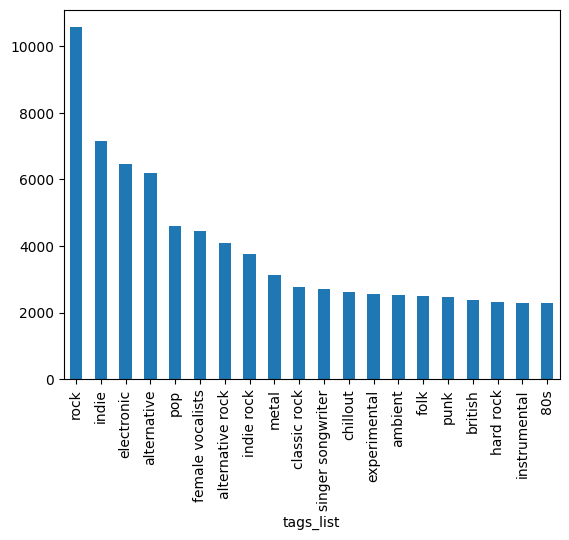

In [ ]:
df['tags_list'].explode().value_counts().head(20).plot.bar()

In [ ]:
cols_to_exclude = ['n_loudness', 'n_tempo']

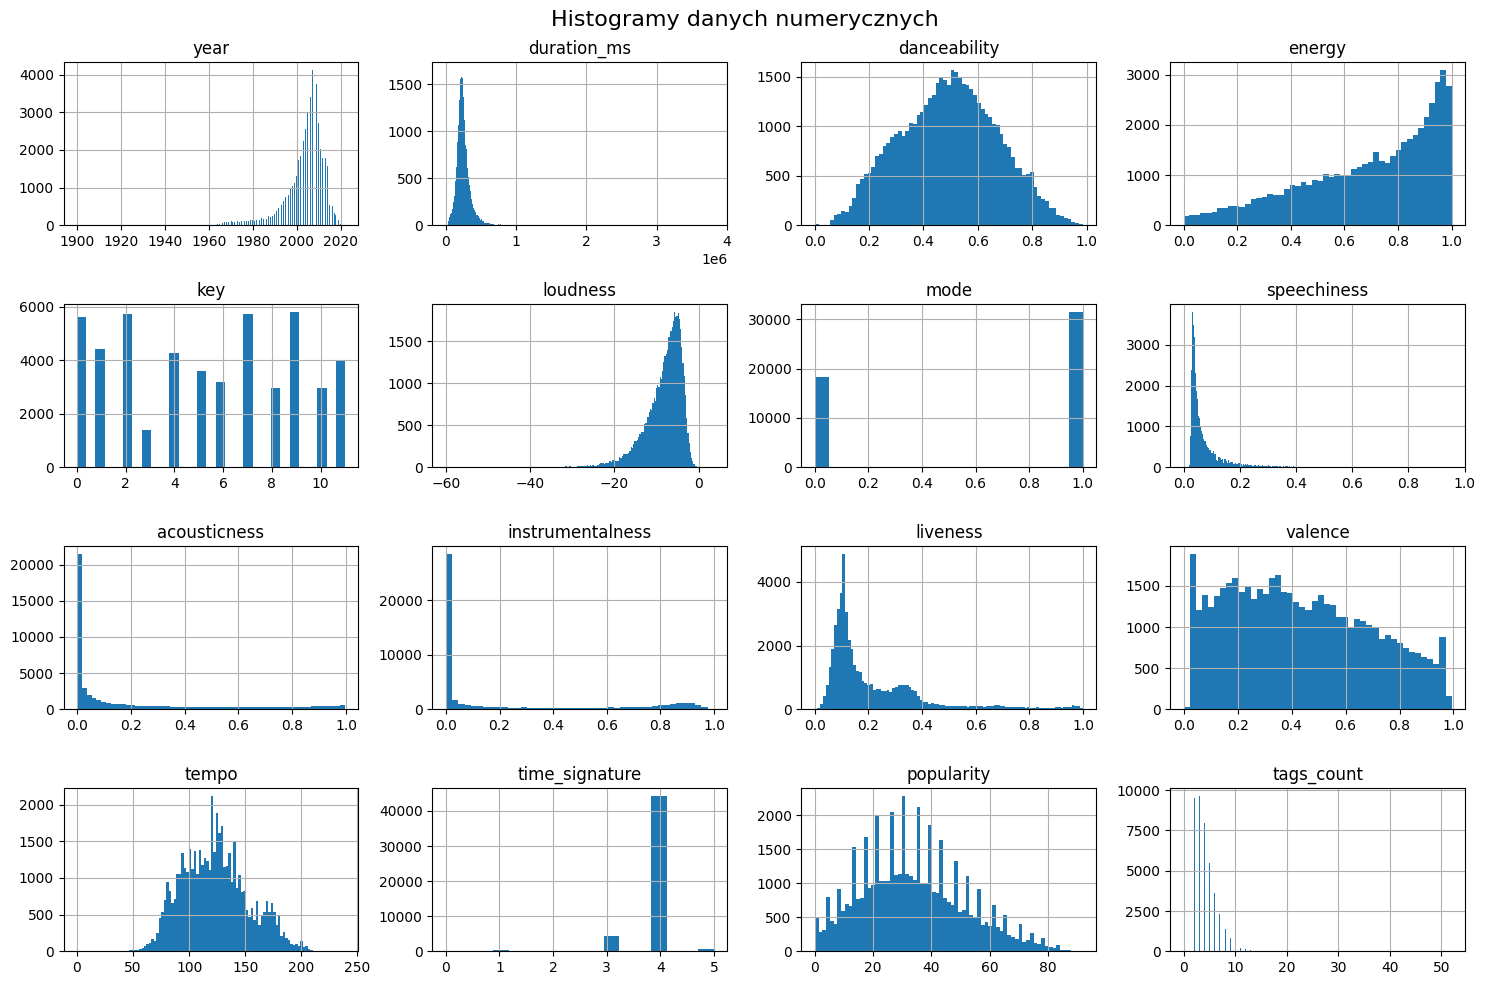

In [ ]:
numeric_data = df.select_dtypes(include=['float64', 'int64']).columns

numeric_data = [col for col in numeric_data if col not in cols_to_exclude]

df[numeric_data].hist(bins='auto', figsize=(15, 10))
plt.suptitle("Histogramy danych numerycznych", fontsize=16)
plt.tight_layout()
plt.show()

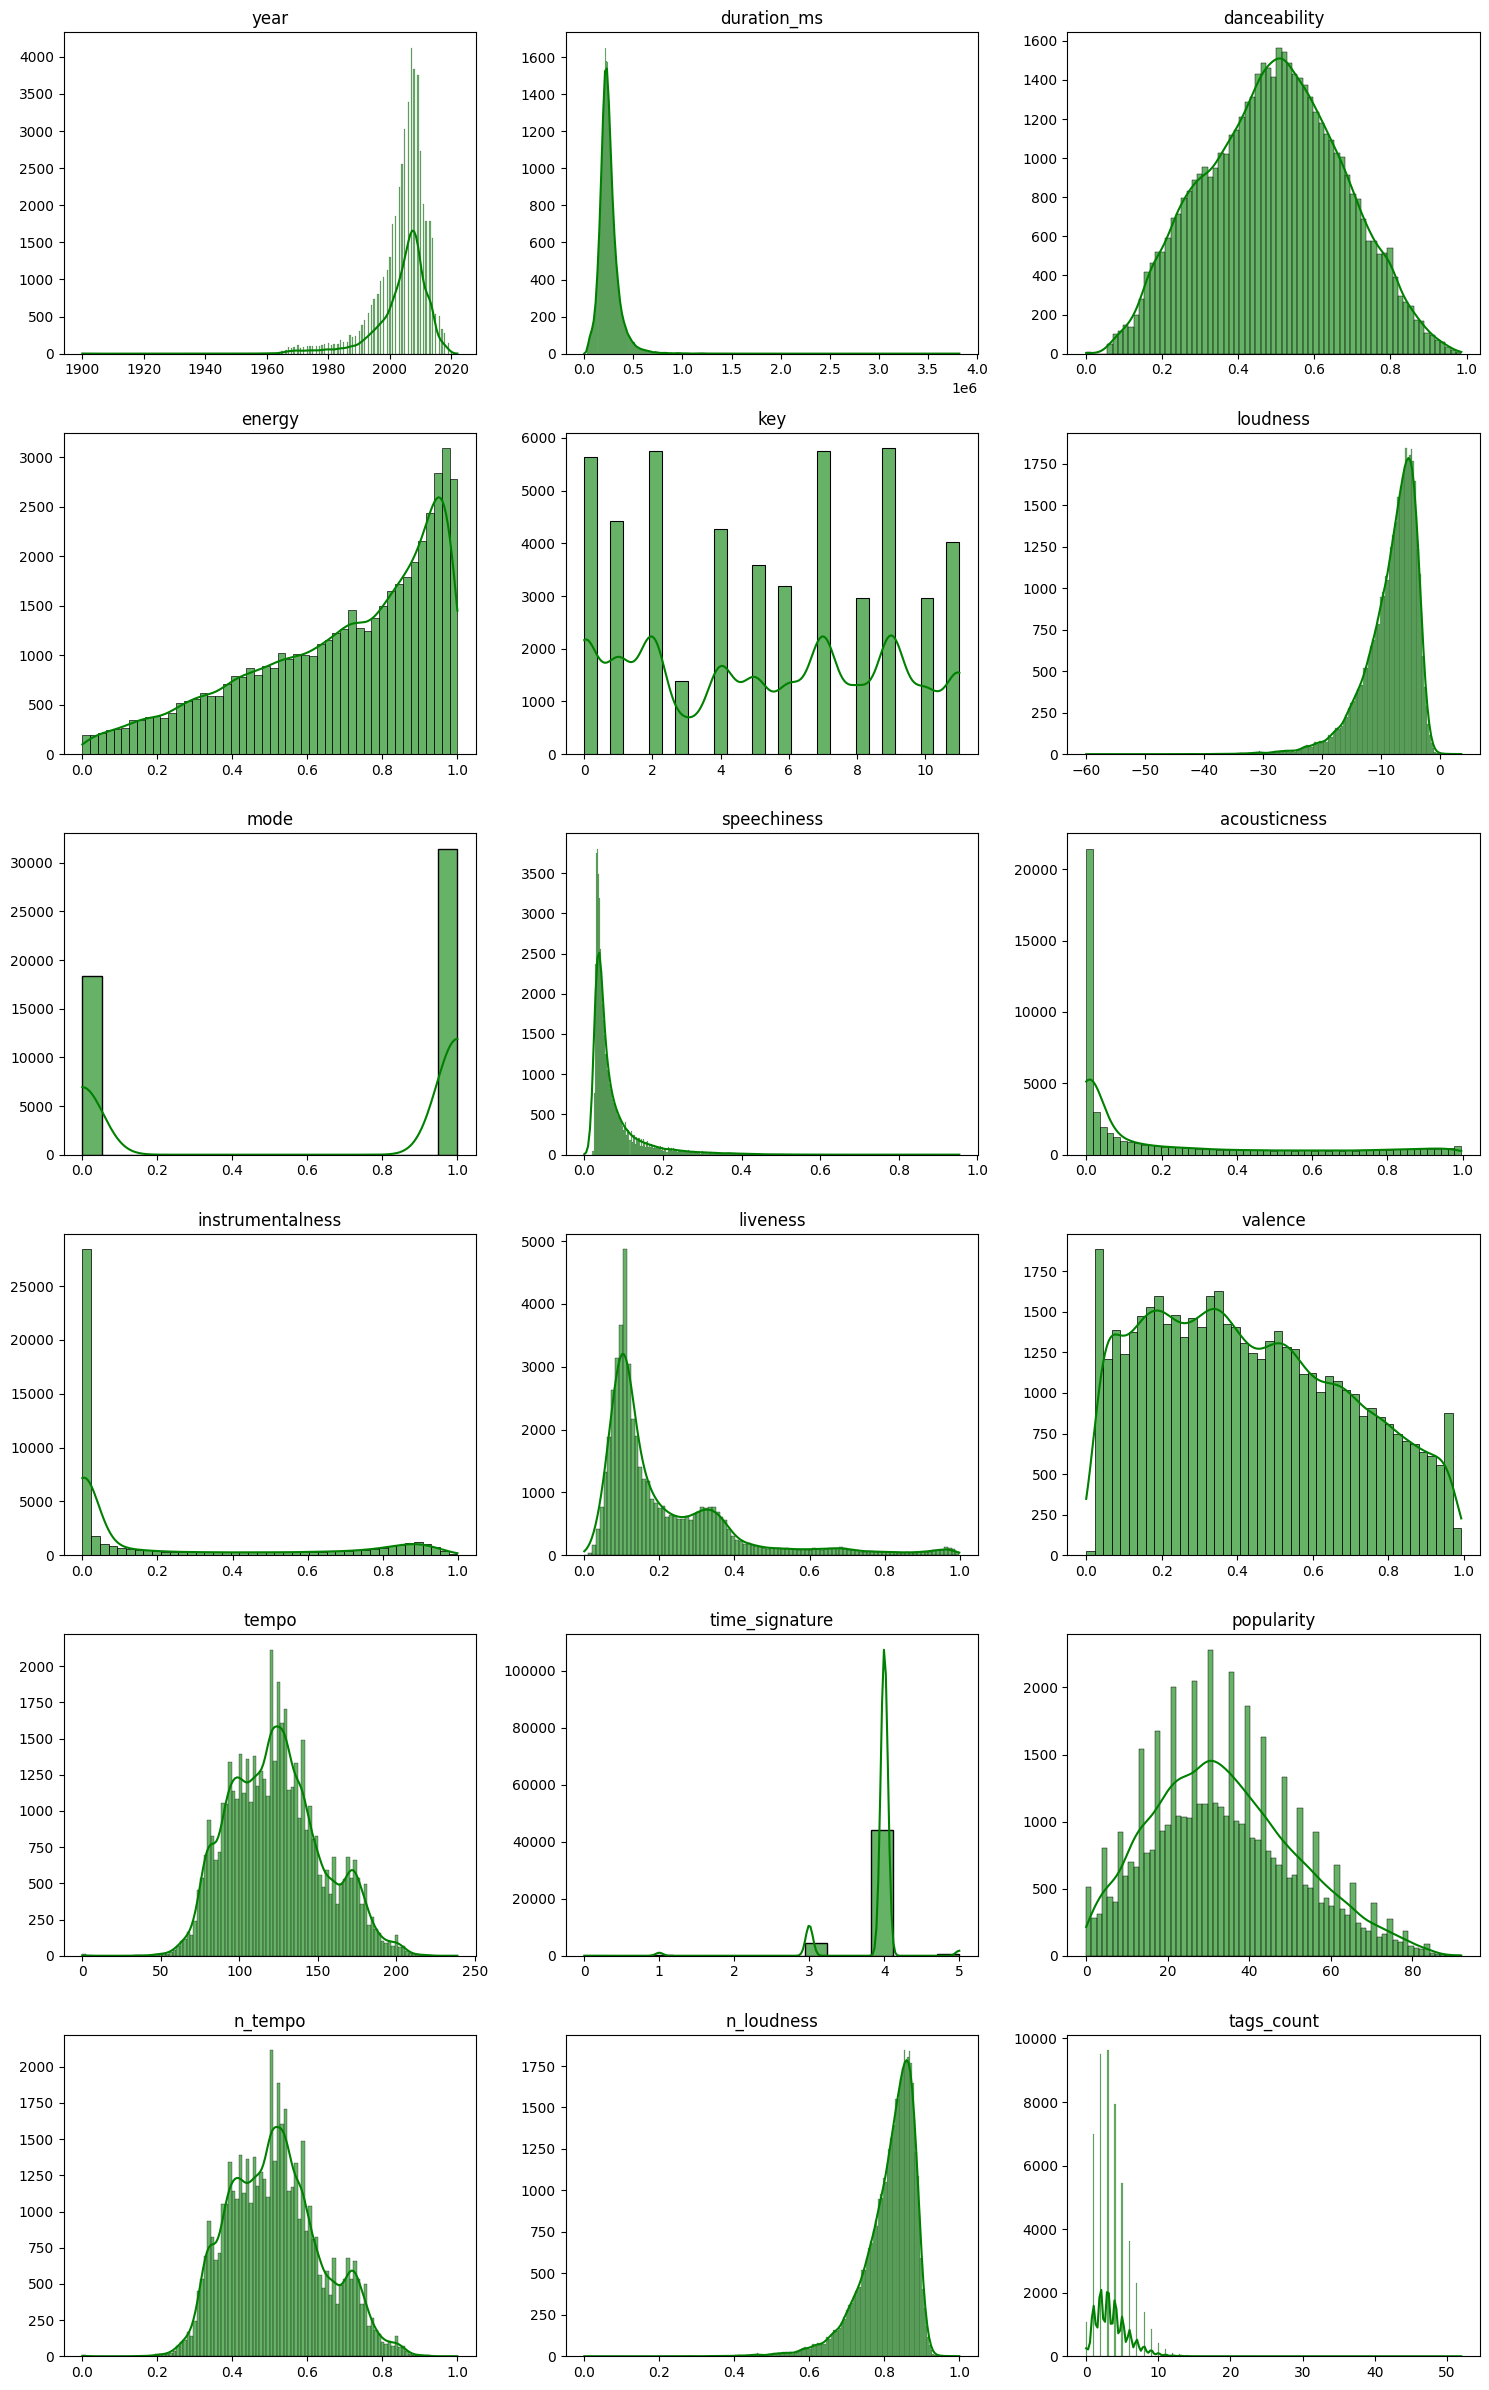

In [ ]:
numeric_data = df.select_dtypes(include=['int64', 'float64']).columns

n_cols = 3
n_rows = (len(numeric_data) + n_cols - 1) // n_cols
plt.figure(figsize=(n_cols*5, n_rows*4))

for i, col in enumerate(numeric_data):
    plt.subplot(n_rows, n_cols, i+1)
    sns.histplot(df[col], kde=True, bins='auto', color='green', alpha=0.6)
    plt.title(col, fontsize=12)
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()

In [ ]:
df['decade'] = (df['year'] // 10) * 10

In [ ]:
df['decade'].value_counts()

decade
2000    27839
2010    11686
1990     7023
1980     1751
1970     1019
1960      388
1950       25
2020       22
1900        8
1930        3
1910        2
Name: count, dtype: int64

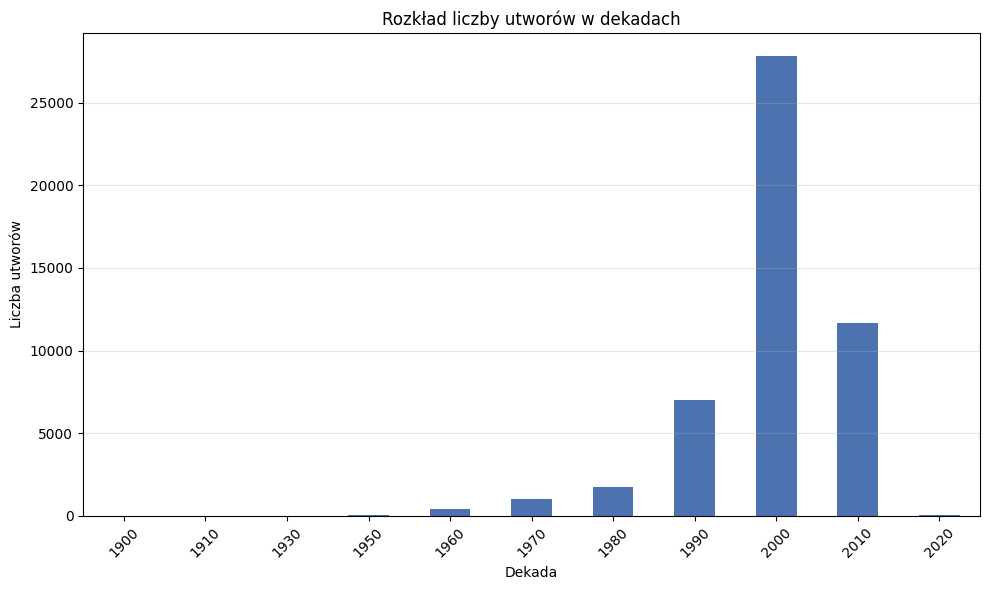

In [ ]:
plt.figure(figsize=(10, 6))
ax = df['decade'].value_counts().sort_index().plot.bar(rot=45, color='#4c72b0')

plt.title('Rozkład liczby utworów w dekadach')
plt.xlabel('Dekada')
plt.ylabel('Liczba utworów')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()

plt.savefig('decades_distribution.png')
plt.show()

<Axes: ylabel='count'>

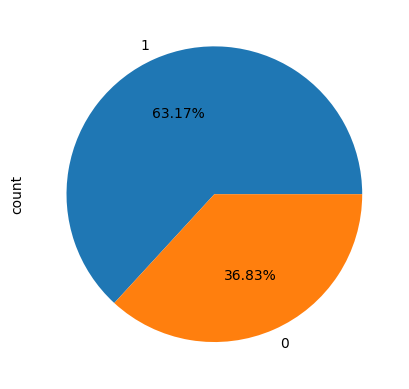

In [ ]:
df['mode'].value_counts().plot.pie(autopct='%0.2f%%')

<Axes: ylabel='count'>

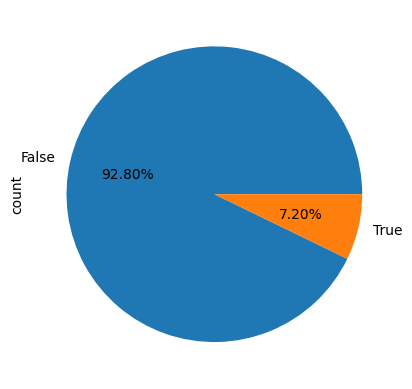

In [ ]:
df['explicit'].value_counts().plot.pie(autopct='%0.2f%%')

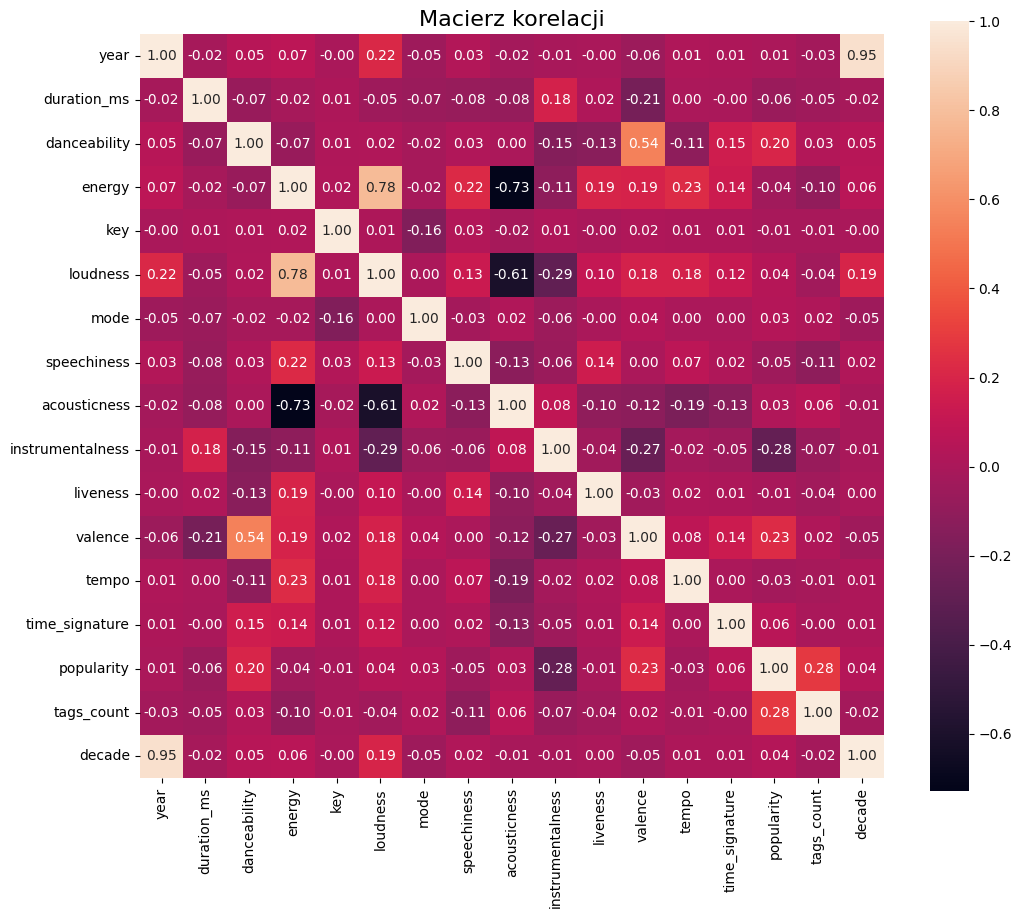

In [ ]:
numeric_df = df.select_dtypes(include='number')

plt.figure(figsize=(12, 10))

numeric_df = numeric_df.drop(columns=cols_to_exclude, errors='ignore')

sns.heatmap(numeric_df.corr(), annot=True, fmt='.2f', square=True)
plt.title('Macierz korelacji', fontsize=16)
plt.show()

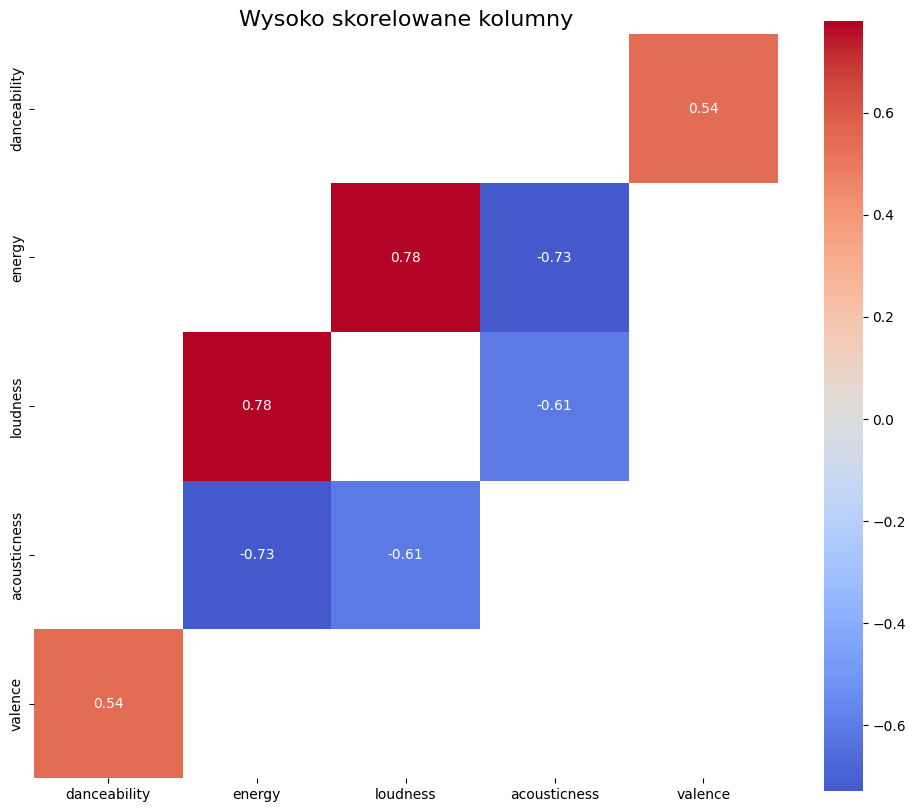

In [ ]:
def get_high_corr_both(df, threshold=0.7, exclude=None):
    df_num = df.select_dtypes(include='number')

    if exclude is not None:
        df_num = df_num.drop(columns=exclude, errors='ignore')

    corr = df_num.select_dtypes(include='number').corr()
    high_corr = corr[((corr >= threshold) | (corr <= -threshold)) & (corr != 1.0)]
    high_corr = high_corr.dropna(how='all', axis=0).dropna(how='all', axis=1)
    return high_corr

high_corr = get_high_corr_both(df, threshold=0.5, exclude=cols_to_exclude + ['decade'])

plt.figure(figsize=(12, 10))
sns.heatmap(high_corr, annot=True, cmap='coolwarm', center=0, square=True)
plt.title('Wysoko skorelowane kolumny', fontsize=16)
plt.show()

In [ ]:
df.columns

Index(['track_id', 'name', 'artist', 'spotify_preview_url', 'tags', 'year',
       'duration_ms', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'album_name', 'popularity',
       'spotify_url', 'explicit', 'album_images', 'spotify_id', 'n_tempo',
       'n_loudness', 'tags_count', 'tags_list', 'decade'],
      dtype='object')

In [ ]:
scaler = MinMaxScaler()

df['n_popularity'] = scaler.fit_transform(df[['popularity']])
df.sample(1)

track_id           name        artist  \
12583  TRPYMYK128F932E4E9  Carry Me Ohio  Sun Kil Moon   

                                     spotify_preview_url  \
12583  https://p.scdn.co/mp3-preview/b37a72cda577ba13...   

                                                    tags  year  duration_ms  \
12583  indie, folk, singer_songwriter, chillout, beau...  2007       381040   

       danceability  energy  key  ...  \
12583         0.594    0.51    6  ...   

                                             spotify_url  explicit  \
12583  https://open.spotify.com/track/6sNT5PF1SjTYgMi...     False   

                                            album_images  \
12583  [{"height": 640, "width": 640, "url": "https:/...   

                   spotify_id   n_tempo  n_loudness  tags_count  \
12583  6sNT5PF1SjTYgMiAIQGYMd  0.407489    0.803825           6   

                                               tags_list  decade n_popularity  
12583  [indie, folk, singer_songwriter, chillout, bea...    2000     0.586957  

[1 rows x 31 columns]

In [ ]:
features = ['energy', 'danceability', 'valence', 'acousticness', 'n_tempo', 'n_loudness']

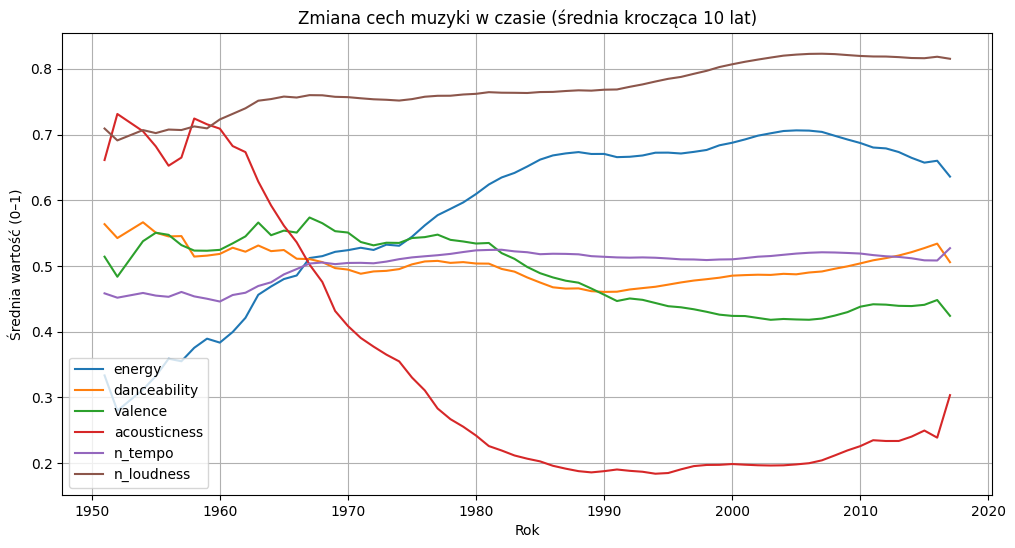

In [ ]:
year_means = df.groupby('year')[features].mean().reset_index()

for col in features:
    year_means[f'{col}_smooth'] = year_means[col].rolling(10, center=True).mean()

plt.figure(figsize=(12, 6))
for col in features:
    plt.plot(
        year_means['year'],
        year_means[f'{col}_smooth'],
        label=col
    )

plt.title('Zmiana cech muzyki w czasie (średnia krocząca 10 lat)')
plt.xlabel('Rok')
plt.ylabel('Średnia wartość (0–1)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
decade_means = df.groupby('decade')[features].mean().reset_index()

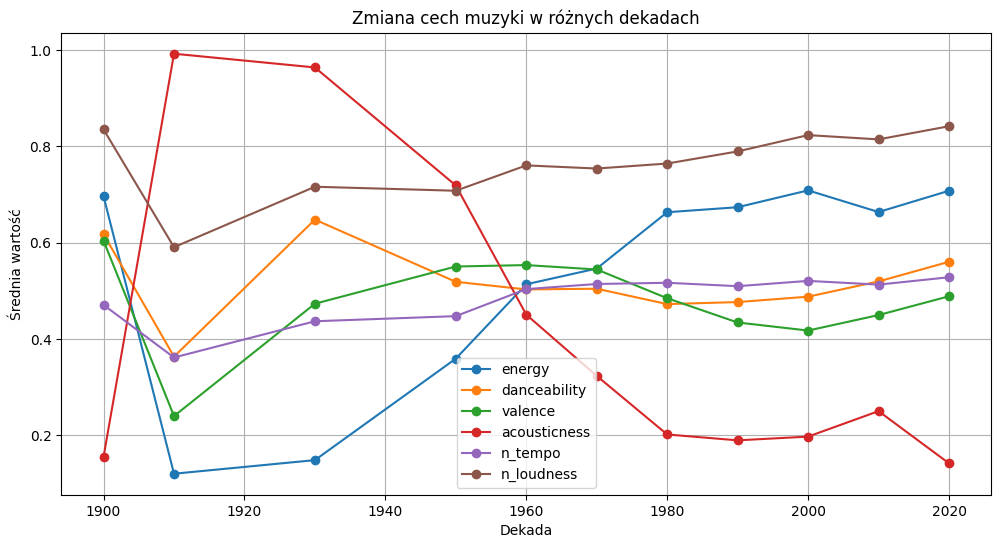

In [ ]:
plt.figure(figsize=(12, 6))
for col in features:
    plt.plot(decade_means['decade'], decade_means[col], marker='o', label=col)

plt.title('Zmiana cech muzyki w różnych dekadach')
plt.xlabel('Dekada')
plt.ylabel('Średnia wartość')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
df.columns

Index(['track_id', 'name', 'artist', 'spotify_preview_url', 'tags', 'year',
       'duration_ms', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'album_name', 'popularity',
       'spotify_url', 'explicit', 'album_images', 'spotify_id', 'n_tempo',
       'n_loudness', 'tags_count', 'tags_list', 'decade', 'n_popularity'],
      dtype='object')

In [ ]:
df_tags = df.explode('tags_list').rename(columns={'tags_list': 'tag'})

df_tags = df_tags.dropna(subset=['tag'])

In [ ]:
audio_features = ['danceability', 'energy', 'speechiness',
                  'acousticness', 'instrumentalness', 'liveness',
                  'valence', 'n_tempo', 'n_loudness', 'n_popularity']

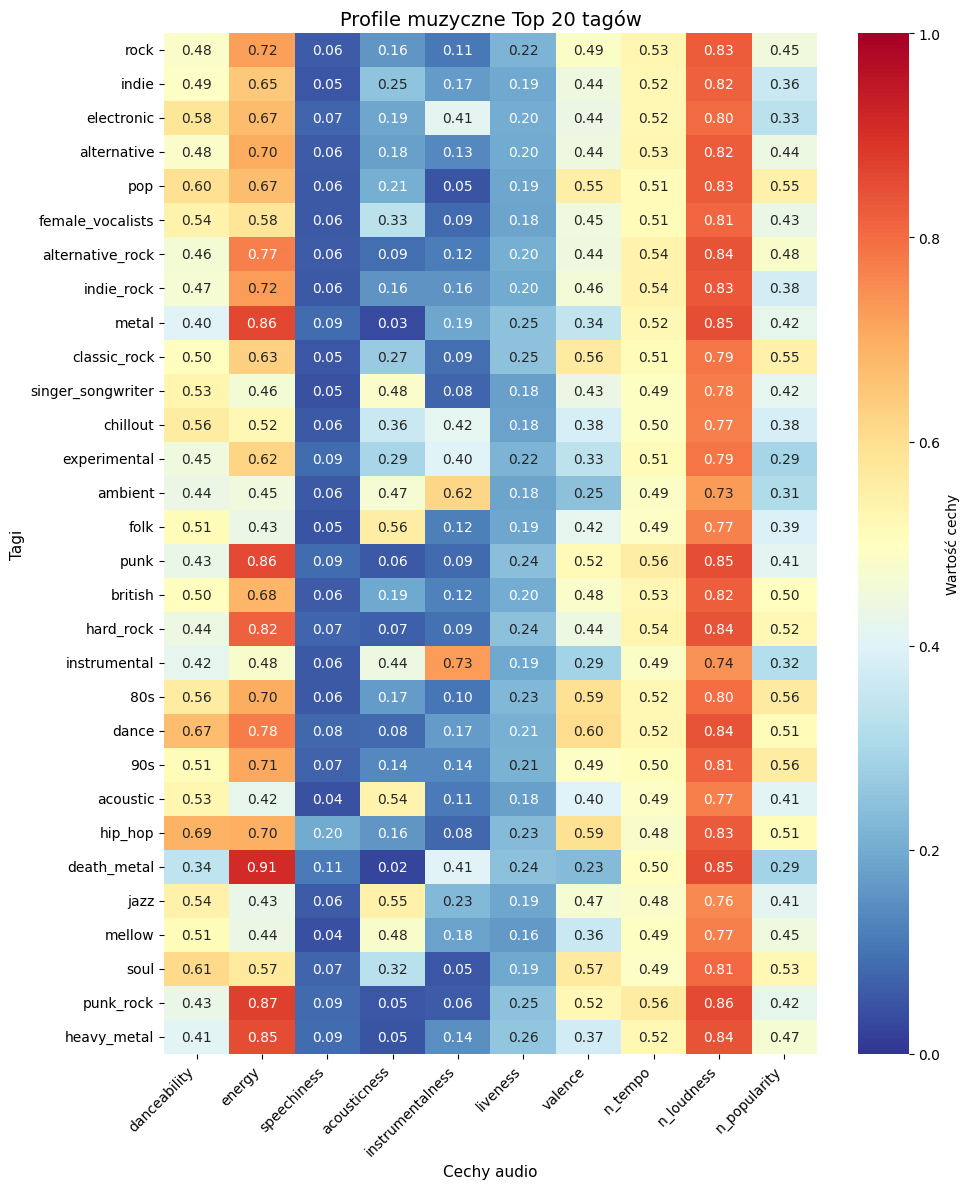

In [ ]:
tag_counts = df_tags['tag'].value_counts().head(30)

top_20_tags = tag_counts.index

df_top_tags = df_tags[df_tags['tag'].isin(top_20_tags)]
tag_profiles = df_top_tags.groupby('tag')[audio_features].mean()
tag_profiles = tag_profiles.reindex(top_20_tags)

plt.figure(figsize=(10, 12))
sns.heatmap(tag_profiles,
            annot=True,
            fmt='.2f',
            cmap='RdYlBu_r',
            center=0.5,
            vmin=0, vmax=1,
            cbar_kws={'label': 'Wartość cechy'},
            linecolor='gray')

plt.title('Profile muzyczne Top 20 tagów', fontsize=14)
plt.xlabel('Cechy audio', fontsize=11)
plt.ylabel('Tagi', fontsize=11)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

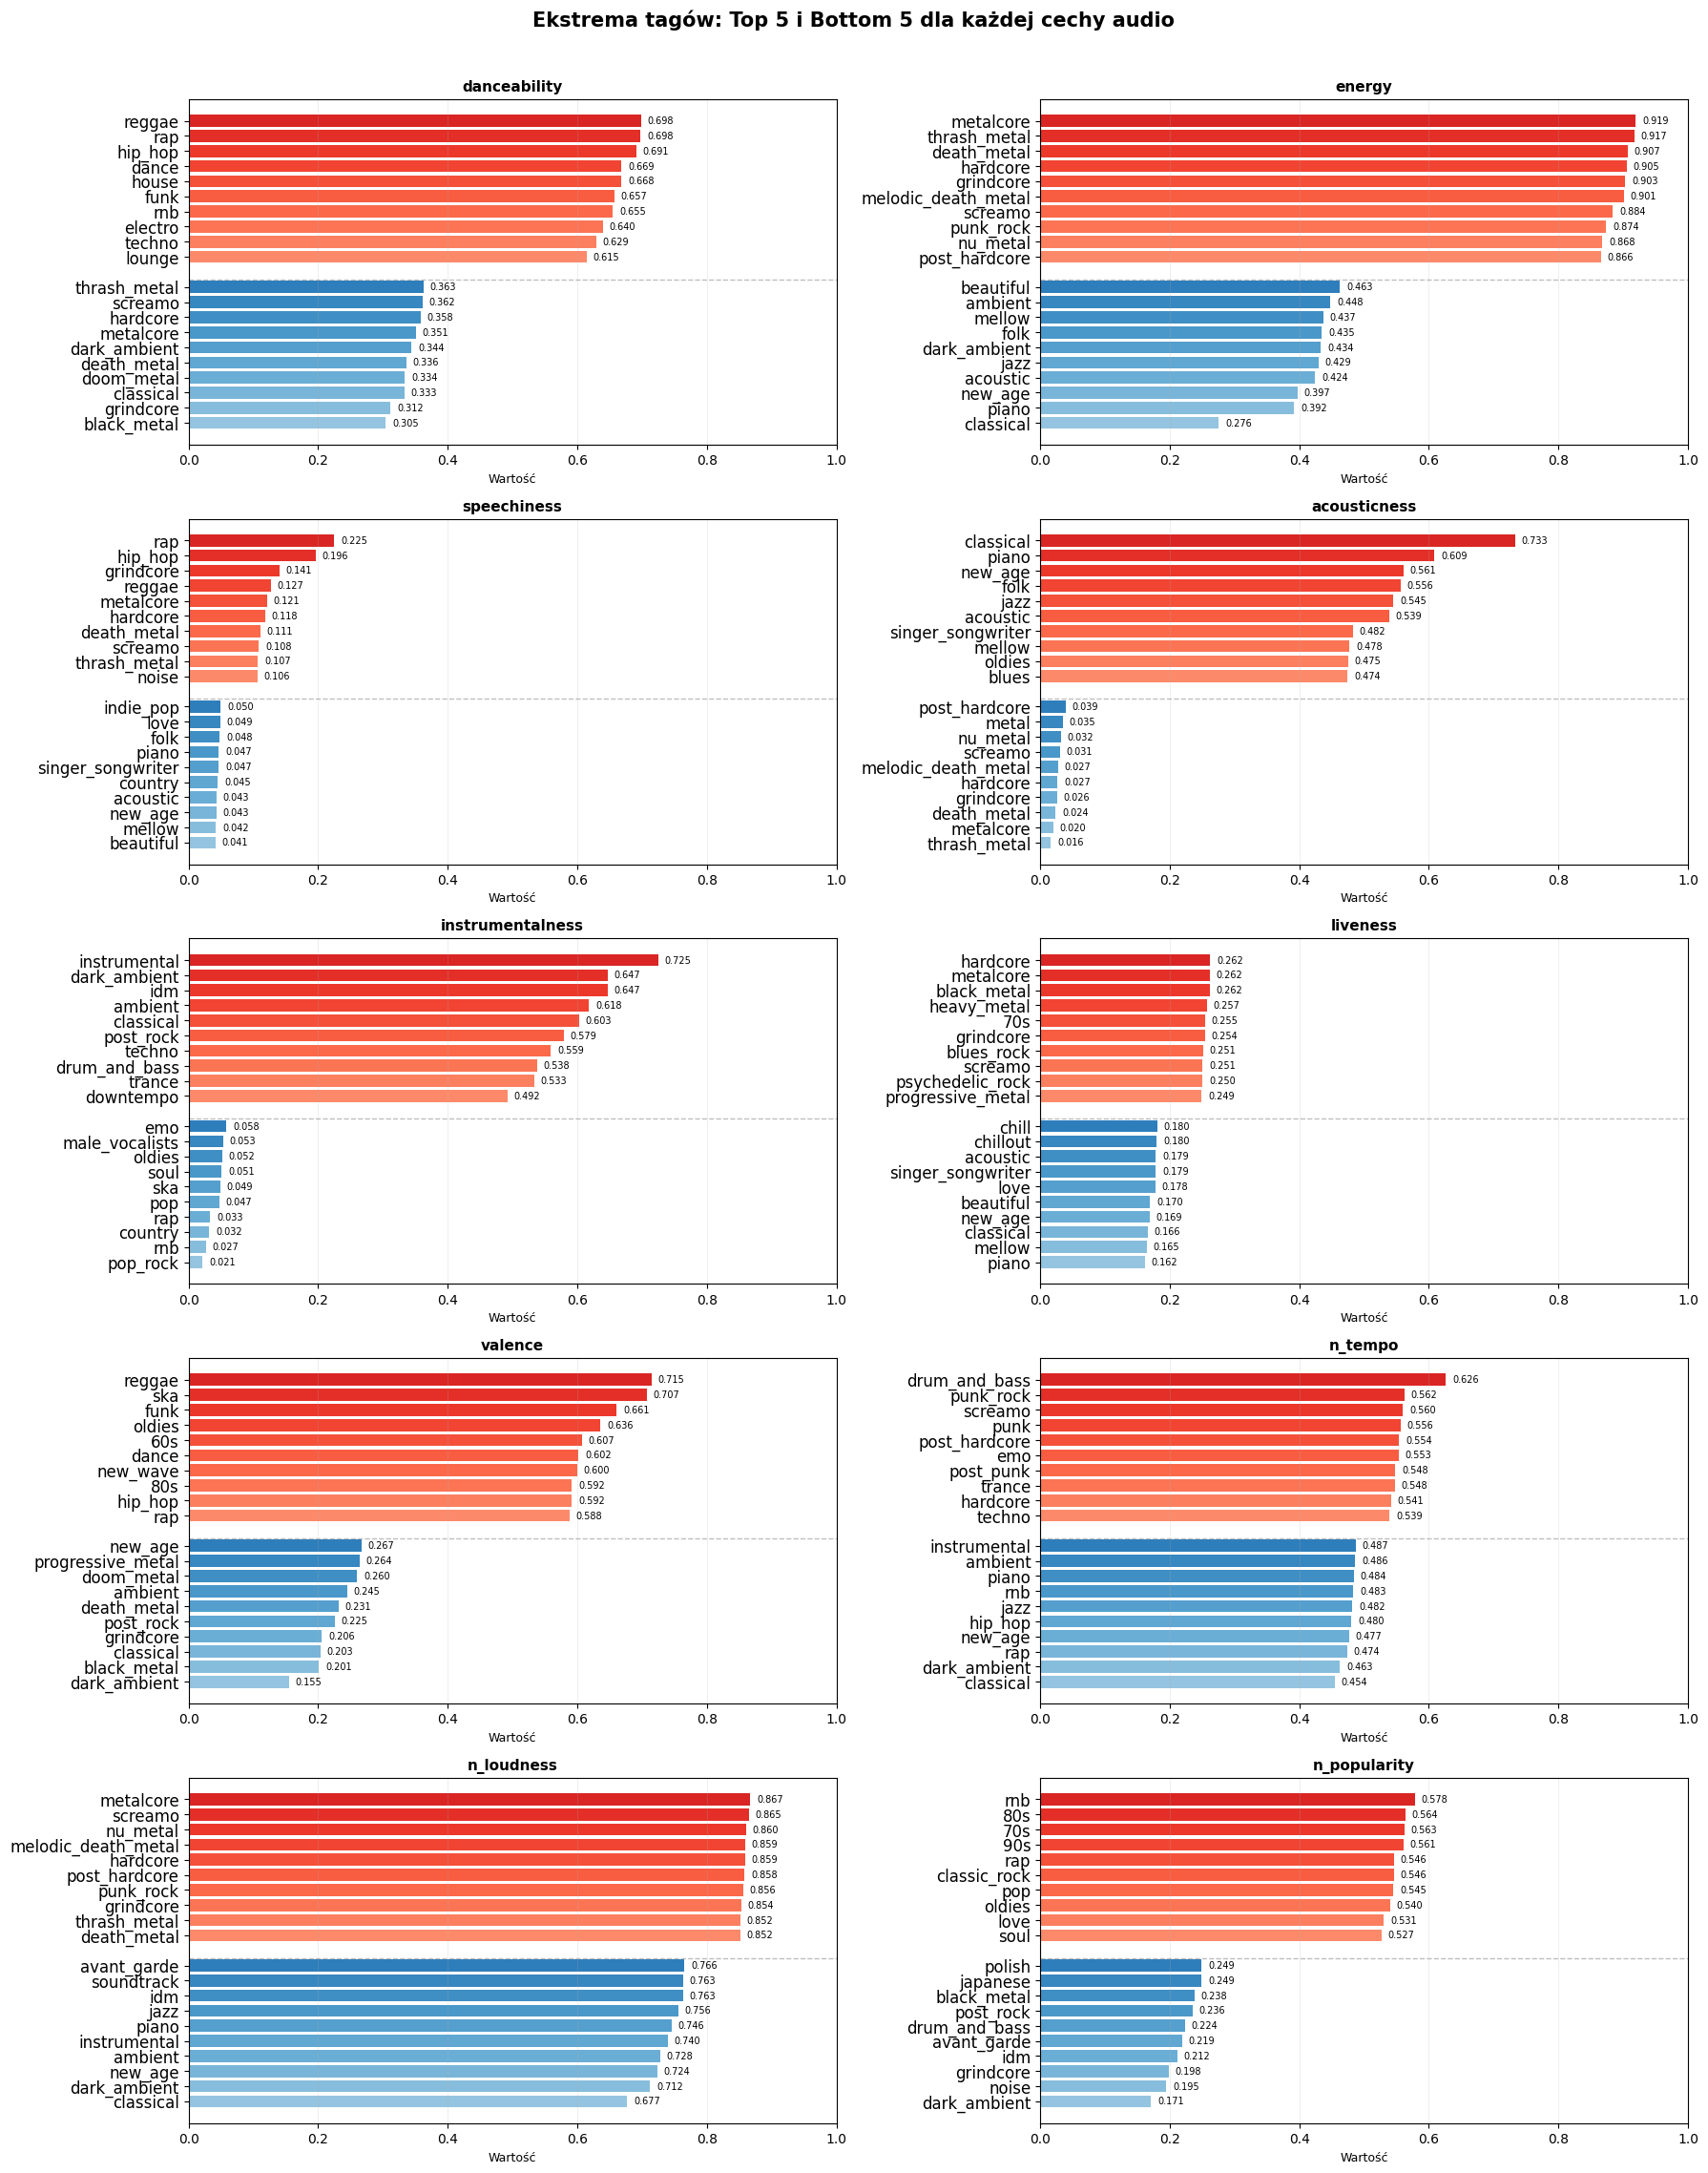

In [ ]:
all_tag_profiles = df_tags.groupby('tag')[audio_features].mean()

extremes_per_feature = {}
for feature in audio_features:
    top_5 = all_tag_profiles[feature].nlargest(10)
    bottom_5 = all_tag_profiles[feature].nsmallest(10)
    extremes_per_feature[feature] = {'top': top_5, 'bottom': bottom_5}

n_features = len(audio_features)
n_cols = 2
n_rows = (n_features + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4.5))
axes = axes.flatten()

for idx, feature in enumerate(audio_features):
    ax = axes[idx]

    top_tags = extremes_per_feature[feature]['top'].sort_values()
    bottom_tags = extremes_per_feature[feature]['bottom']

    all_tags = pd.concat([bottom_tags, top_tags])
    positions = list(range(len(bottom_tags))) + list(range(len(bottom_tags)+1,
    len(bottom_tags)+len(top_tags)+1))

    colors_bottom = plt.cm.Blues(np.linspace(0.4, 0.7, len(bottom_tags)))
    colors_top = plt.cm.Reds(np.linspace(0.4, 0.7, len(top_tags)))
    colors = np.vstack([colors_bottom, colors_top])

    bars = ax.barh(positions, all_tags.values, color=colors)

    ax.set_yticks(positions)
    labels = list(bottom_tags.index) + list(top_tags.index)
    ax.set_yticklabels(labels, fontsize=12)

    ax.axhline(y=len(bottom_tags)-0.5, color='gray', linestyle='--', alpha=0.5, linewidth=1)

    ax.set_title(f'{feature}', fontsize=11, fontweight='bold')
    ax.set_xlabel('Wartość', fontsize=9)
    ax.set_xlim(0, 1)

    for bar, value in zip(bars, all_tags.values):
        ax.text(value + 0.01, bar.get_y() + bar.get_height()/2,
                f'{value:.3f}', va='center', fontsize=7)

    ax.grid(axis='x', alpha=0.2)

for idx in range(n_features, len(axes)):
    axes[idx].set_visible(False)

plt.suptitle('Ekstrema tagów: Top 5 i Bottom 5 dla każdej cechy audio',
             fontsize=15, fontweight='bold', y=1.01)
plt.tight_layout()
plt.show()

In [ ]:
from math import pi

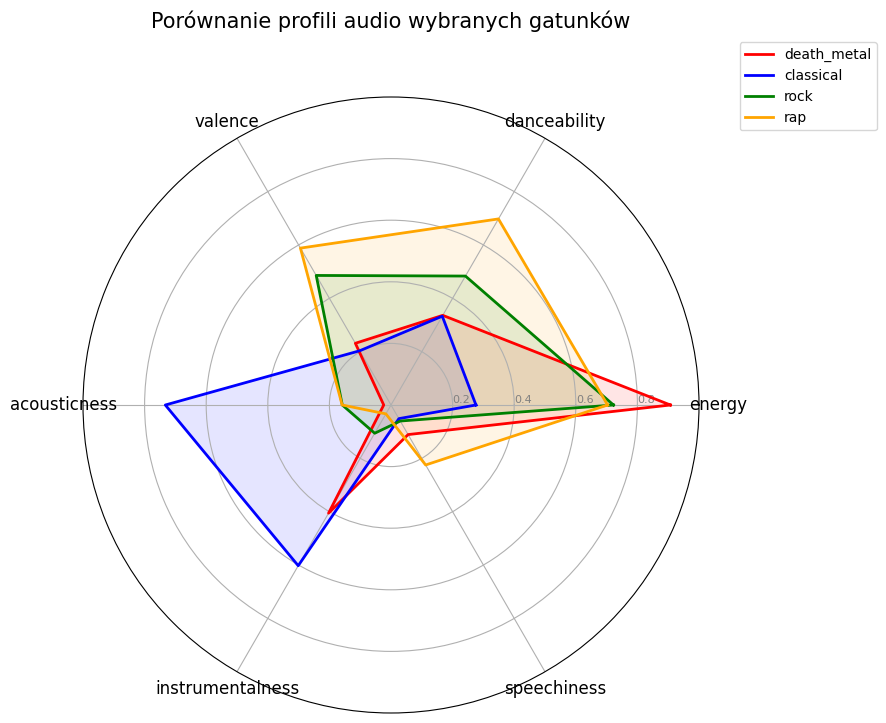

In [ ]:
tags_to_plot = ['death_metal', 'classical', 'rock', 'rap']

available_tags = [t for t in tags_to_plot if t in all_tag_profiles.index]

radar_features = ['energy', 'danceability', 'valence', 'acousticness', 'instrumentalness', 'speechiness']

N = len(radar_features)

angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

colors = ['red', 'blue', 'green', 'orange']

for i, tag in enumerate(available_tags):
    values = all_tag_profiles.loc[tag, radar_features].values.flatten().tolist()
    values += values[:1]

    ax.plot(angles, values, linewidth=2, linestyle='solid', label=tag, color=colors[i % len(colors)])
    ax.fill(angles, values, color=colors[i % len(colors)], alpha=0.1)

plt.xticks(angles[:-1], radar_features, size=12)

ax.set_rlabel_position(0)
plt.yticks([0.2, 0.4, 0.6, 0.8], ["0.2", "0.4", "0.6", "0.8"], color="grey", size=8)
plt.ylim(0, 1)

plt.title('Porównanie profili audio wybranych gatunków', size=15, y=1.1)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

plt.show()

In [ ]:
rap_songs = df_tags[df_tags['tag'] == 'rap']

print("Statystyki speechiness dla RAPu:")
print(rap_songs['speechiness'].agg(['mean', 'max', 'min', 'median']))

Statystyki speechiness dla RAPu:
mean      0.22489
max       0.95000
min       0.02560
median    0.22100
Name: speechiness, dtype: float64


/tmp/ipython-input-790613339.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


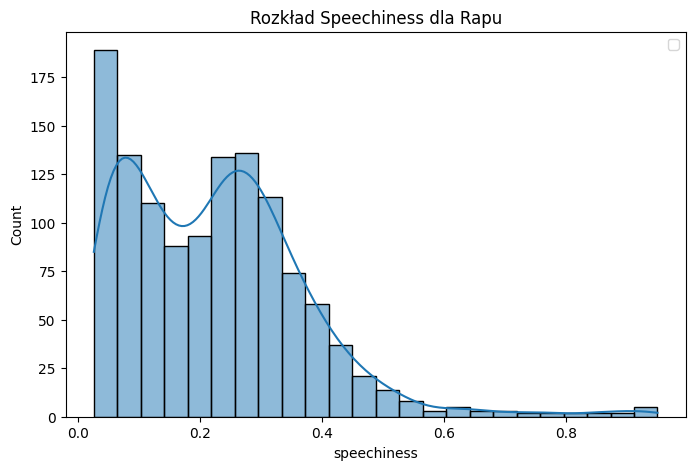

In [ ]:
rap = df_tags[df_tags['tag'] == 'rap']['speechiness']

plt.figure(figsize=(8, 5))
sns.histplot(rap, kde=True)
plt.legend()
plt.title('Rozkład Speechiness dla Rapu')
plt.show()

/tmp/ipython-input-1494407279.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


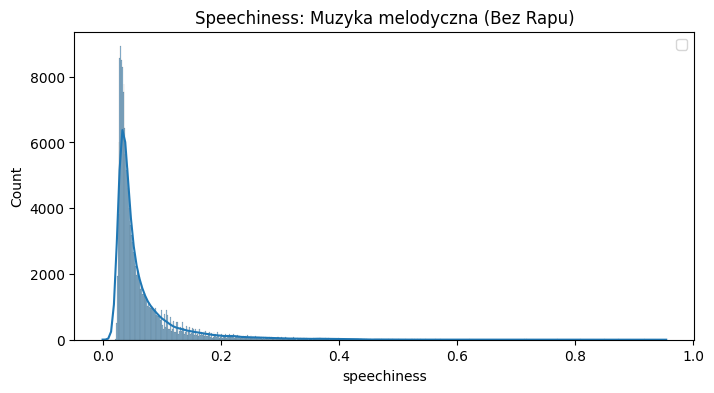

In [ ]:
non_rap = df_tags[~df_tags['tag'].isin(['rap', 'hip hop', 'hip-hop', 'trap', 'spoken word'])]['speechiness']

plt.figure(figsize=(8, 4))
sns.histplot(non_rap, kde=True)
plt.title('Speechiness: Muzyka melodyczna (Bez Rapu)')
plt.legend()
plt.show()

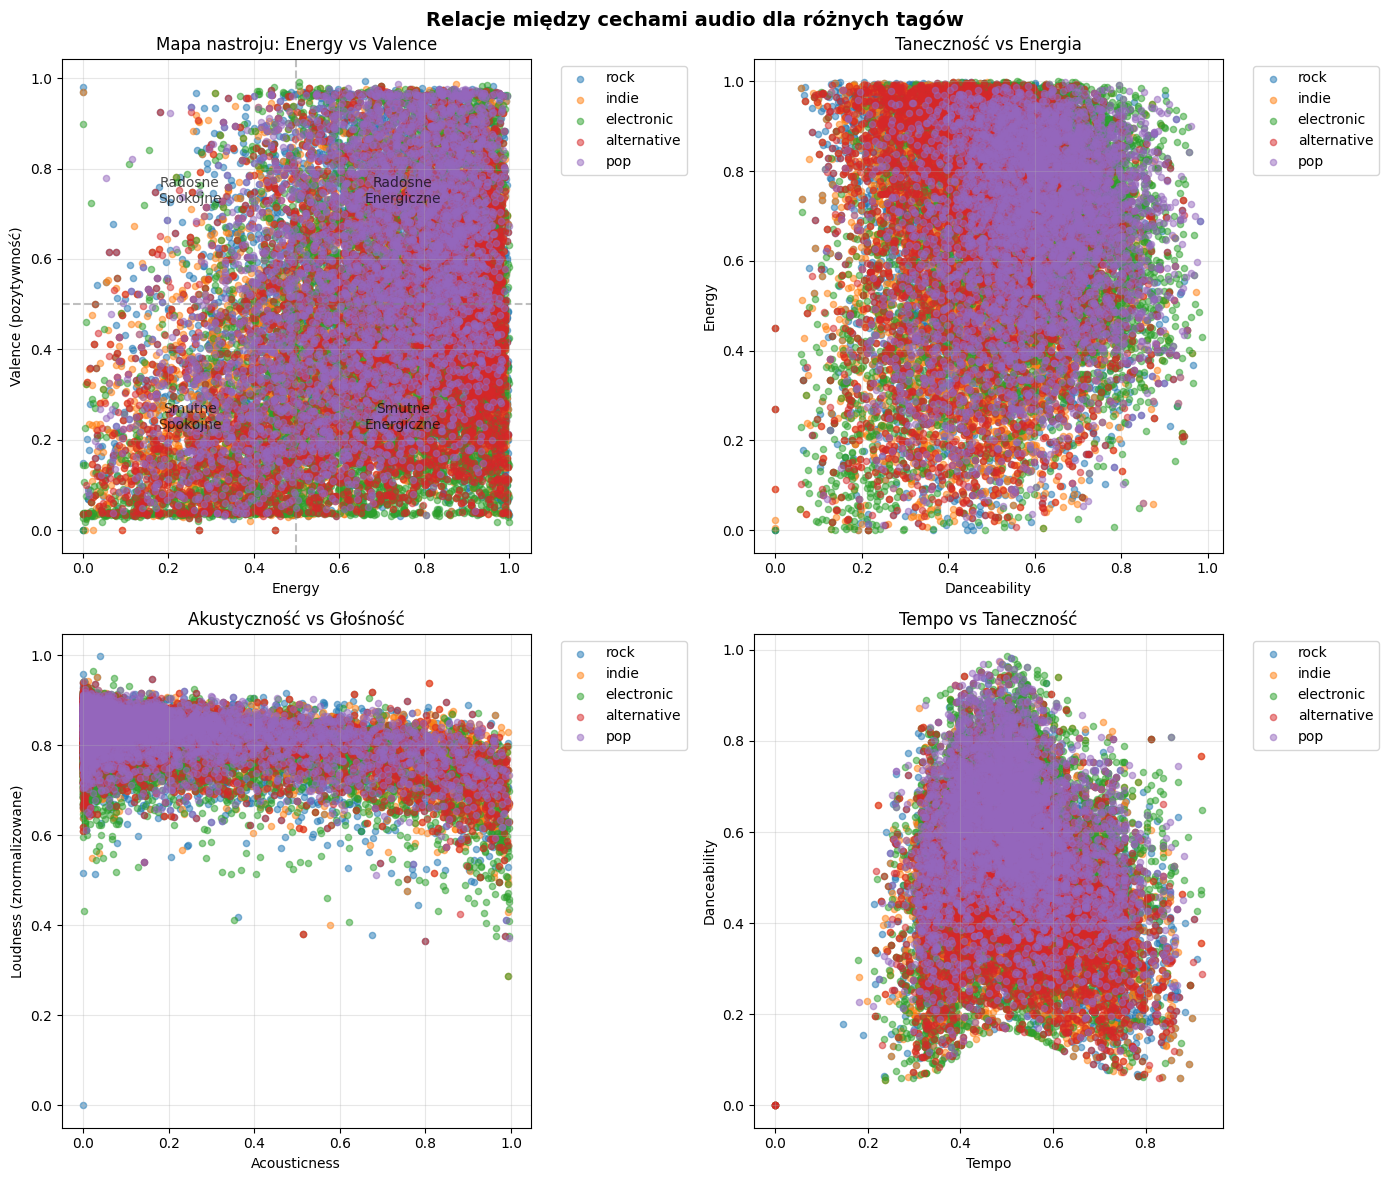

In [ ]:
top_10_tags = tag_counts.head(10).index
df_scatter = df_tags[df_tags['tag'].isin(top_10_tags)].copy()

fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Energy vs Valence
ax1 = axes[0, 0]
for tag in top_10_tags[:5]:
    data = df_scatter[df_scatter['tag'] == tag]
    ax1.scatter(data['energy'], data['valence'],
               label=tag, alpha=0.5, s=20)
ax1.set_xlabel('Energy')
ax1.set_ylabel('Valence (pozytywność)')
ax1.set_title('Mapa nastroju: Energy vs Valence')
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.grid(True, alpha=0.3)

# kwadranty nastroju
ax1.axhline(y=0.5, color='gray', linestyle='--', alpha=0.5)
ax1.axvline(x=0.5, color='gray', linestyle='--', alpha=0.5)
ax1.text(0.25, 0.25, 'Smutne\nSpokojne', ha='center', va='center', alpha=0.7)
ax1.text(0.75, 0.25, 'Smutne\nEnergiczne', ha='center', va='center', alpha=0.7)
ax1.text(0.25, 0.75, 'Radosne\nSpokojne', ha='center', va='center', alpha=0.7)
ax1.text(0.75, 0.75, 'Radosne\nEnergiczne', ha='center', va='center', alpha=0.7)

# Danceability vs Energy
ax2 = axes[0, 1]
for tag in top_10_tags[:5]:
    data = df_scatter[df_scatter['tag'] == tag]
    ax2.scatter(data['danceability'], data['energy'],
               label=tag, alpha=0.5, s=20)
ax2.set_xlabel('Danceability')
ax2.set_ylabel('Energy')
ax2.set_title('Taneczność vs Energia')
ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax2.grid(True, alpha=0.3)

# Acousticness vs Loudness
ax3 = axes[1, 0]
for tag in top_10_tags[:5]:
    data = df_scatter[df_scatter['tag'] == tag]
    ax3.scatter(data['acousticness'], data['n_loudness'],
               label=tag, alpha=0.5, s=20)
ax3.set_xlabel('Acousticness')
ax3.set_ylabel('Loudness (znormalizowane)')
ax3.set_title('Akustyczność vs Głośność')
ax3.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax3.grid(True, alpha=0.3)

# Tempo vs Danceability
ax4 = axes[1, 1]
for tag in top_10_tags[:5]:
    data = df_scatter[df_scatter['tag'] == tag]
    ax4.scatter(data['n_tempo'], data['danceability'],
               label=tag, alpha=0.5, s=20)
ax4.set_xlabel('Tempo')
ax4.set_ylabel('Danceability')
ax4.set_title('Tempo vs Taneczność')
ax4.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax4.grid(True, alpha=0.3)

plt.suptitle('Relacje między cechami audio dla różnych tagów', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()